In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import os
from IPython.display import HTML, display
import calendar
from datetime import datetime
import collections

sns.set_style('darkgrid')
sns.set(font_scale=1.5)

# Data Loading

In [19]:
#dfs = []
dfs = {}

path = '../GB_Datasets/Data'
for file in os.listdir(path):
    #print(file)
    df = pd.read_csv(path + '/' + file)
    date = datetime.strptime(file.split('_')[0], '%y.%d.%m').date()
    dfs[date] = df
    
dfs = collections.OrderedDict(sorted(dfs.items()))
print(dfs.keys())

odict_keys([datetime.date(2019, 12, 11), datetime.date(2019, 12, 12), datetime.date(2019, 12, 13), datetime.date(2019, 12, 14), datetime.date(2019, 12, 16), datetime.date(2019, 12, 17), datetime.date(2019, 12, 18), datetime.date(2019, 12, 19), datetime.date(2019, 12, 20), datetime.date(2019, 12, 21), datetime.date(2019, 12, 22), datetime.date(2019, 12, 23), datetime.date(2019, 12, 24), datetime.date(2019, 12, 25), datetime.date(2019, 12, 26), datetime.date(2019, 12, 27), datetime.date(2019, 12, 28), datetime.date(2019, 12, 29), datetime.date(2019, 12, 30), datetime.date(2019, 12, 31), datetime.date(2020, 1, 1), datetime.date(2020, 1, 2), datetime.date(2020, 1, 3), datetime.date(2020, 1, 5), datetime.date(2020, 1, 7), datetime.date(2020, 1, 9), datetime.date(2020, 1, 10), datetime.date(2020, 1, 11), datetime.date(2020, 1, 12), datetime.date(2020, 1, 14), datetime.date(2020, 1, 15), datetime.date(2020, 1, 16), datetime.date(2020, 1, 18), datetime.date(2020, 1, 19), datetime.date(2020, 1,

In [20]:
class YTVideo:
    def __init__(self, df_row, days_in_trending=1):
        self.video_id = df_row.video_id
        self.title = df_row.title
        self.published_at = df_row.publishedAt
        self.channel_id = df_row.channelId
        self.channel_title = df_row.channelTitle
        self.category_id = df_row.categoryId
        self.trending_date = df_row.trending_date
        self.tags = df_row.tags
        self.view_count = df_row.view_count
        self.likes = df_row.likes
        self.dislikes = df_row.dislikes
        self.comment_count = df_row.comment_count
        self.thumbnail_link = df_row.thumbnail_link
        self.comments_disabled = df_row.comments_disabled
        self.ratings_disabled = df_row.ratings_disabled
        self.description = df_row.description
        self.days_in_trending = days_in_trending
        
    def __str__(self):
        retval = 'Video ID: {}\nTitle: {}\nPublished at: {}\nChannel ID: {}\nChannel title: {}\nCategory ID: {}\nTrending date: {}\nTags: {}\nView count: {}\nLikes: {}\nDislikes: {}\nComment count: {}\nThumbnail link: {}\nComments disabled: {}\nRatings disabled: {}\nDescription: {}\nDays in trending: {}\n'.format(self.video_id, self.title, self.published_at, self.channel_id, self.channel_title, self.category_id, self.trending_date, self.tags, self.view_count, self.likes, self.dislikes, self.comment_count, self.thumbnail_link, self.comments_disabled, self.ratings_disabled, self.description, self.days_in_trending)
        return retval
    
    def to_dict(self):
        return {
            'video_id': self.video_id,
            'title': self.title,
            'published_at': self.published_at,
            'channel_id': self.channel_id,
            'channel_title': self.channel_title,
            'category_id': self.category_id,
            'trending_date': self.trending_date,
            'tags': self.tags,
            'view_count': self.view_count,
            'likes': self.likes,
            'dislikes': self.dislikes,
            'comment_count': self.comment_count,
            'thumbnail_link': self.thumbnail_link,
            'comments_disabled': self.comments_disabled,
            'ratings_disabled': self.ratings_disabled,
            'description': self.description,
            'days_in_trending': self.days_in_trending
        }

In [25]:
first_day = list(dfs.values())[0].iloc[0].trending_date
last_day = list(dfs.values())[-1].iloc[0].trending_date
print(first_day)
print(last_day)

videos = dict()

# u obzir dolaze videi koji su usli i izasli iz trendinga za vreme skupljanja podataka
for df in dfs.values():
    for index, row in df.iterrows():
        if row.video_id in videos:
            videos[row.video_id].days_in_trending += 1
        else:
            # provera da li video iz naseg prvog dana
            if row.trending_date != first_day and row.trending_date != last_day:
                videos[row.video_id] = YTVideo(row)

19.11.12
20.09.02


In [26]:
for video in videos.values():
    print(video)
    print('---------------------------------------------------------------------------------------------------')

Video ID: y7TlnQq6XzI
Title: congrats ksi
Published at: 2019-12-11T18:59:22.000Z
Channel ID: UCG8rbF3g2AMX70yOd8vqIZg
Channel title: Logan Paul
Category ID: 24
Trending date: 19.12.12
Tags: logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|ksi|ksi vs logan|logan paul boxing|logan paul appeal|logan paul fight|logan paul boxing fight|boxing review|ksi boxing|logan appeal|two points|raid|shadow legends
View count: 2044821
Likes: 139610
Dislikes: 30568
Comment count: 21254
Thumbnail link: https://i.ytimg.com/vi/y7TlnQq6XzI/default.jpg
Comments disabled: False
Ratings disabled: False
Description: Install Raid for Free ✅ IOS: http://bit.ly/LoganPaul_iOS ✅ ANDROID: http://bit.ly/LoganPaul_android Start with💰50K silver and get a Free Epic Champion 💥 on day 7 of “New Player Rewards” programJoin the movement. Be a Maverick ► https://ShopLoganPaul.com/on to the next chapter...SUBSCRIBE FOR DAILY VLOGS! ► http://bit.

---------------------------------------------------------------------------------------------------
Video ID: a0HJTwmFN4k
Title: THIS CLUB'S A SLOW DEATH! Man United 1-3 Man City Semi-Final EFL CUP | Andy Tate Fan Cam
Published at: 2020-01-07T23:31:44.000Z
Channel ID: UC7w8GnTF2Sp3wldDMtCCtVw
Channel title: FullTimeDEVILS
Category ID: 17
Trending date: 20.09.01
Tags: manchester united|manchester|man utd|football|soccer|fulltimedevils|full time devils|manchester united news|united|man united|solskjaer|mufc|manchester united fan tv|man utd fan tv|fan channel|man u transfer news|manchester utd|utd|man utd vs man city|1-3|utd 1-3 city|manchester derby|man utd 1-3 man city|rashford goal vs city|rashford goal|ole gunnar solskjaer|jesse lingard|phil jones|brandon williams|david de gea|efl cup|carabao cup|fan reaction
View count: 80130
Likes: 1348
Dislikes: 136
Comment count: 606
Thumbnail link: https://i.ytimg.com/vi/a0HJTwmFN4k/default.jpg
Comments disabled: False
Ratings disabled: False
Des

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [27]:
print('Broj videa: {}'.format(len(videos)))

Broj videa: 2070


In [28]:
# kreiranje dataframe-a
videos_df = pd.DataFrame([video.to_dict() for video in videos.values()])

In [29]:
videos_df

video_id                                              title  \
0     y7TlnQq6XzI                                       congrats ksi   
1     IByJccZwUlE  Club Brugge vs Real Madrid (1-3) | UEFA Champi...   
2     eb90gqGYP9c              THE WITCHER | FINAL TRAILER | NETFLIX   
3     vPx6M7eTYbc     Spill Your Guts: Harry Styles & Kendall Jenner   
4     Zm7Zya6Hl50              STORMZY - AUDACITY (feat. HEADIE ONE)   
...           ...                                                ...   
2065  FY2VH9rhG8o  Restaurant Has A Box Of DEAD, Open, Dirty Muss...   
2066  1P55j9ub4es  4 Levels of Salmon: Amateur to Food Scientist ...   
2067  Hxl2nycwTT4  Taste Testing the Latest Food Trend Products V...   
2068  VbSxodeKCdU    Mura Masa & slowthai: Deal Wiv It (US TV Debut)   
2069  kzBc2-jBlw8                       Microwave Popcorn Taste Test   

                  published_at                channel_id  \
0     2019-12-11T18:59:22.000Z  UCG8rbF3g2AMX70yOd8vqIZg   
1     2019-12-11T22:33:06.000Z  UC4i_9WvfPRTuRWEaWyfKuFw   
2     2019-12-12T10:15:01.000Z  UCWOA1ZGywLbqmigxE4Qlvuw   
3     2019-12-11T07:08:34.000Z  UCJ0uqCI0Vqr2Rrt1HseGirg   
4     2019-12-11T17:11:51.000Z  UC7D-09kUG6Ei11SVO_deW_w   
...                        ...                       ...   
2065  2020-02-05T17:00:04.000Z  UCUZzyuAlhHNP3oiuMjn7RfQ   
2066  2020-02-05T17:00:01.000Z  UCcjhYlL1WRBjKaJsMH_h7Lg   
2067  2020-02-05T16:00:04.000Z  UCfyehHM_eo4g5JUyWmms2LA   
2068  2020-02-05T05:31:37.000Z  UC8-Th83bH_thdKZDJCrn88g   
2069  2020-02-05T11:00:12.000Z  UC4PooiX37Pld1T8J5SYT-SQ   

                               channel_title  category_id trending_date  \
0                                 Logan Paul           24      19.12.12   
1                                   BT Sport           17      19.12.12   
2                                    Netflix           24      19.12.12   
3       The Late Late Show with James Corden           24      19.12.12   
4                                    Stormzy           10      19.12.12   
...                                      ...          ...           ...   
2065                      Kitchen Nightmares           24      20.06.02   
2066                              Epicurious           24      20.06.02   
2067                              SORTEDfood           26      20.06.02   
2068  The Tonight Show Starring Jimmy Fallon           23      20.06.02   
2069                   Good Mythical Morning           24      20.06.02   

                                                   tags  view_count   likes  \
0     logan paul vlog|logan paul|logan|paul|olympics...     2044821  139610   
1     sp:ty=high|sp:dt=2019-12-11T20:00:00Z|sp:st=so...      361939    4073   
2     The Witcher|Witcher|Henry Cavill|Geralt of Riv...      891295   60449   
3     The Late Late Show|Late Late Show|James Corden...    11118737  555670   
4     SOUNDS OF THE SKENG|STORMZY|CROWN|VOSSI BOP|OF...      958583   77346   
...                                                 ...         ...     ...   
2065  Gordon Ramsay kitchen nightmares|Gordon Ramsay...      195547    4904   
2066  salmon recipe|make salmon|4 levels of salmon|h...      506085   13393   
2067  Sorted|Sortedfood|sorted food|Food trend produ...      292774   12912   
2068  tonight show|talk|Jimmy Fallon|Margot Robbie|J...      170224    8042   
2069  gmm|good mythical morning|rhettandlink|rhett a...     1226737   38256   

      dislikes  comment_count                                  thumbnail_link  \
0        30568          21254  https://i.ytimg.com/vi/y7TlnQq6XzI/default.jpg   
1          123            264  https://i.ytimg.com/vi/IByJccZwUlE/default.jpg   
2         2588           5394  https://i.ytimg.com/vi/eb90gqGYP9c/default.jpg   
3         7799          19648  https://i.ytimg.com/vi/vPx6M7eTYbc/default.jpg   
4          795           3433  https://i.ytimg.com/vi/Zm7Zya6Hl50/default.jpg   
...        ...            ...                                             ...   
2065  

In [30]:
# add category_name label to dataframe
category_df = pd.read_csv('../GB_Datasets/Categories.csv')

def map_category_id_to_name(category_id):
    return category_df[category_df['category_id'] == category_id]['category_name'].values[0]

videos_df['category_name'] = videos_df['category_id'].apply(lambda var: map_category_id_to_name(var))

In [31]:
videos_df.head()

video_id                                              title  \
0  y7TlnQq6XzI                                       congrats ksi   
1  IByJccZwUlE  Club Brugge vs Real Madrid (1-3) | UEFA Champi...   
2  eb90gqGYP9c              THE WITCHER | FINAL TRAILER | NETFLIX   
3  vPx6M7eTYbc     Spill Your Guts: Harry Styles & Kendall Jenner   
4  Zm7Zya6Hl50              STORMZY - AUDACITY (feat. HEADIE ONE)   

               published_at                channel_id  \
0  2019-12-11T18:59:22.000Z  UCG8rbF3g2AMX70yOd8vqIZg   
1  2019-12-11T22:33:06.000Z  UC4i_9WvfPRTuRWEaWyfKuFw   
2  2019-12-12T10:15:01.000Z  UCWOA1ZGywLbqmigxE4Qlvuw   
3  2019-12-11T07:08:34.000Z  UCJ0uqCI0Vqr2Rrt1HseGirg   
4  2019-12-11T17:11:51.000Z  UC7D-09kUG6Ei11SVO_deW_w   

                          channel_title  category_id trending_date  \
0                            Logan Paul           24      19.12.12   
1                              BT Sport           17      19.12.12   
2                               Netflix           24      19.12.12   
3  The Late Late Show with James Corden           24      19.12.12   
4                               Stormzy           10      19.12.12   

                                                tags  view_count   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...     2044821  139610   
1  sp:ty=high|sp:dt=2019-12-11T20:00:00Z|sp:st=so...      361939    4073   
2  The Witcher|Witcher|Henry Cavill|Geralt of Riv...      891295   60449   
3  The Late Late Show|Late Late Show|James Corden...    11118737  555670   
4  SOUNDS OF THE SKENG|STORMZY|CROWN|VOSSI BOP|OF...      958583   77346   

   dislikes  comment_count                                  thumbnail_link  \
0     30568          21254  https://i.ytimg.com/vi/y7TlnQq6XzI/default.jpg   
1       123            264  https://i.ytimg.com/vi/IByJccZwUlE/default.jpg   
2      2588           5394  https://i.ytimg.com/vi/eb90gqGYP9c/default.jpg   
3      7799          19648  https://i.ytimg.com/vi/vPx6M7eTYbc/default.jpg   
4       795           3433  https://i.ytimg.com/vi/Zm7Zya6Hl50/default.jpg   

   comments_disabled  ratings_disabled  \
0              False             False   
1              False             False   
2              False             False   
3              False             False   
4              False             False   

                                         description  days_in_trending  \
0  Install Raid for Free ✅ IOS: http://bit.ly/Log...                 7   
1  Real Madrid eased to victory in Belgium with V...                 1   
2  On a Continent riddled with evil, the paths of...                 4   
3  Late Late Show guest host Harry Styles challen...                 1   
4  STREAM/ DOWNLOAD AUDACITY NOW: https://stormzy...                 1   

   category_name  
0  Entertainment  
1          Sport  
2  Entertainment  
3  Entertainment  
4          Music

# Exploratory Data Analysis

### Top 15 most popular categories by number of videos in trending

[Text(0, 0.5, 'Number of videos in trending'), Text(0.5, 0, 'Category')]

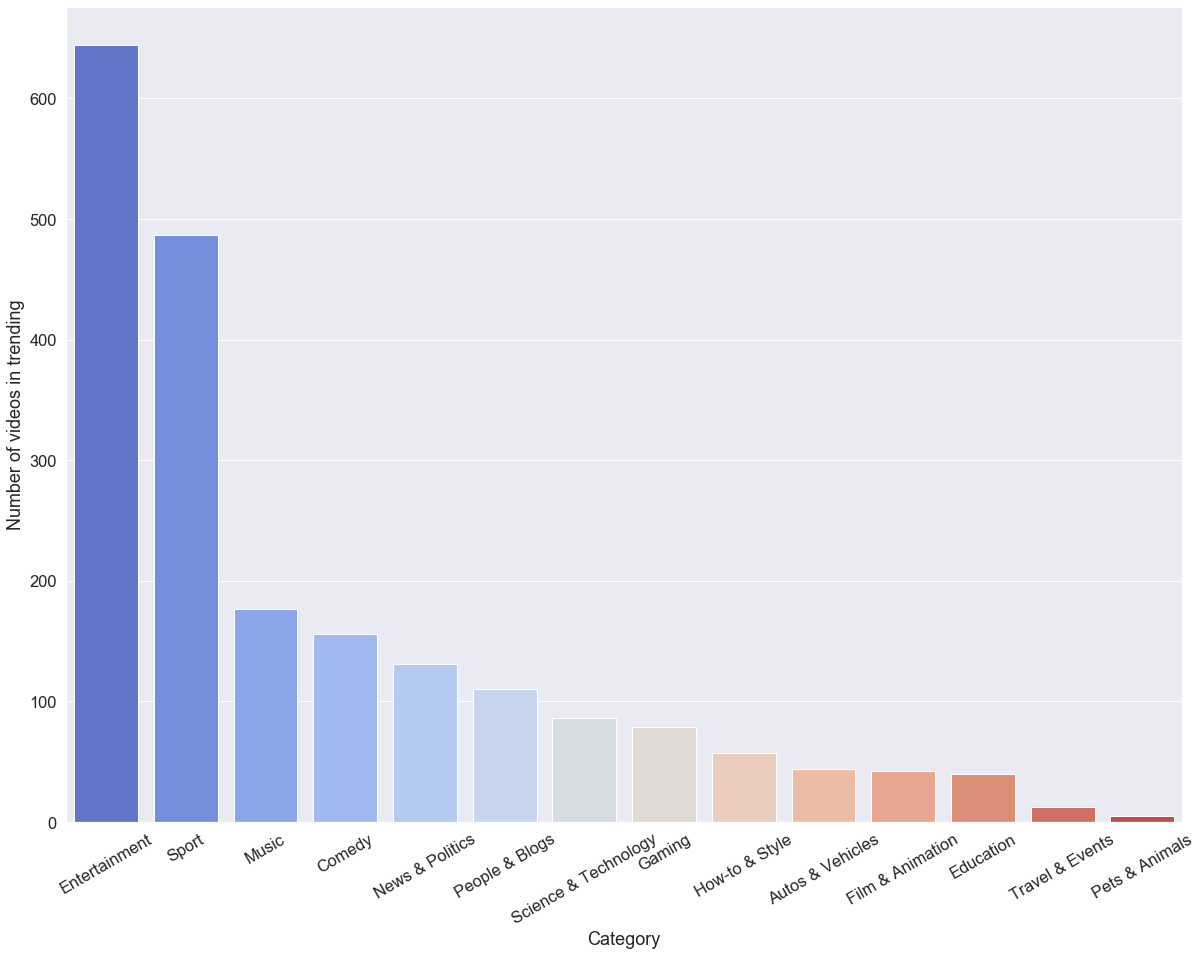

In [32]:
# Most popular categories by number of videos in trending
fig, ax = plt.subplots(figsize=(20, 15))
sns.countplot(x='category_name', data=videos_df, order=videos_df['category_name'].value_counts().index, palette='coolwarm', ax=ax)
plt.xticks(rotation=30)
ax.set(xlabel='Category', ylabel='Number of videos in trending')

### Top 15 most popular channels by number of videos in trending

[Text(0, 0.5, 'Channel Title'), Text(0.5, 0, 'Number of videos in trending')]

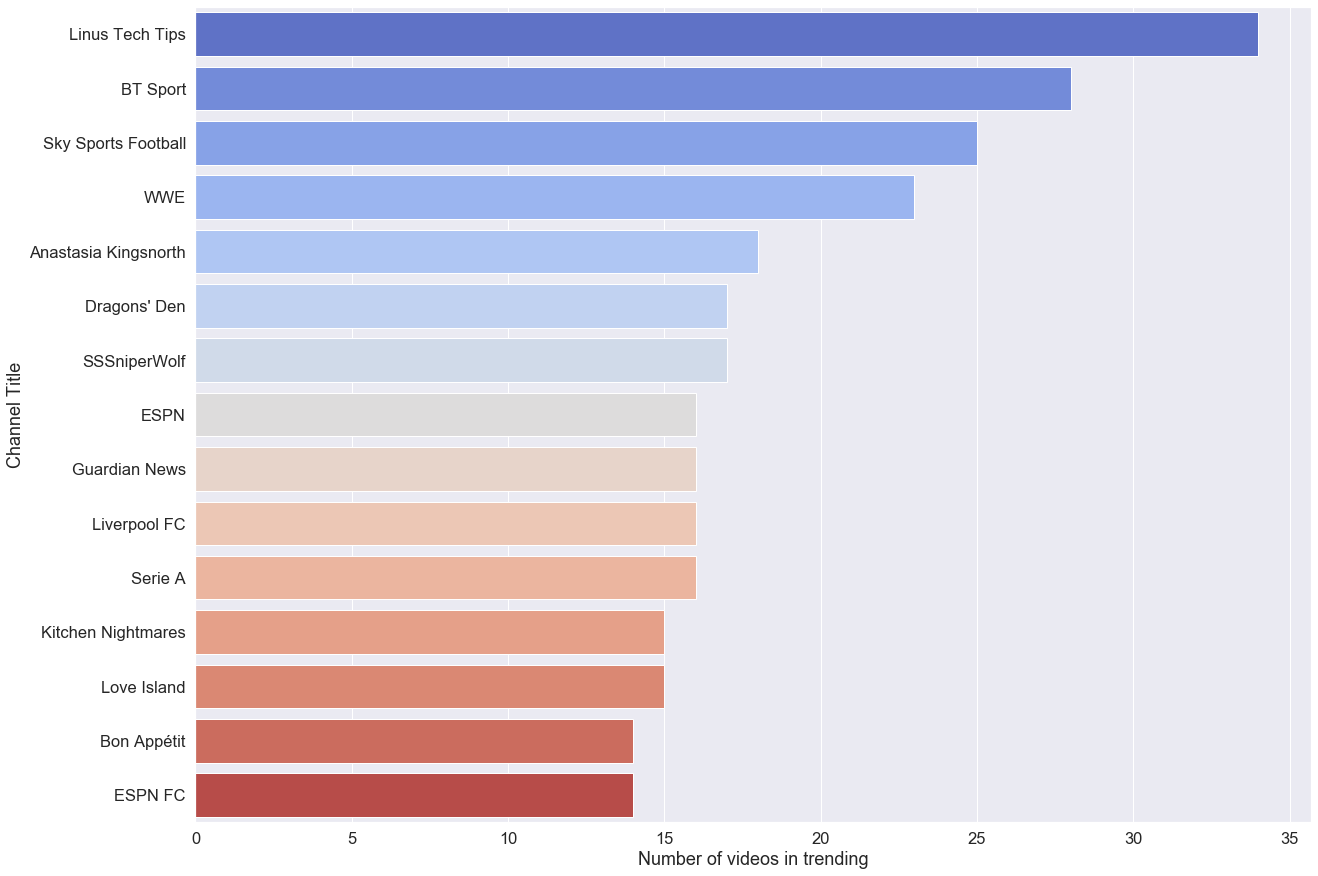

In [33]:
# Most popular channels by number of videos in trending
channel_trending_videos = videos_df.groupby('channel_title')[['video_id', 'channel_title']].count()
top_channels = channel_trending_videos.nlargest(15, 'video_id')

fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x=top_channels['channel_title'], y=top_channels.index, palette='coolwarm', ax=ax)
ax.set(xlabel='Number of videos in trending', ylabel='Channel Title')

### Top 15 most popular channels by number of views

[Text(0, 0.5, 'Channel Title'), Text(0.5, 0, 'Total number of views')]

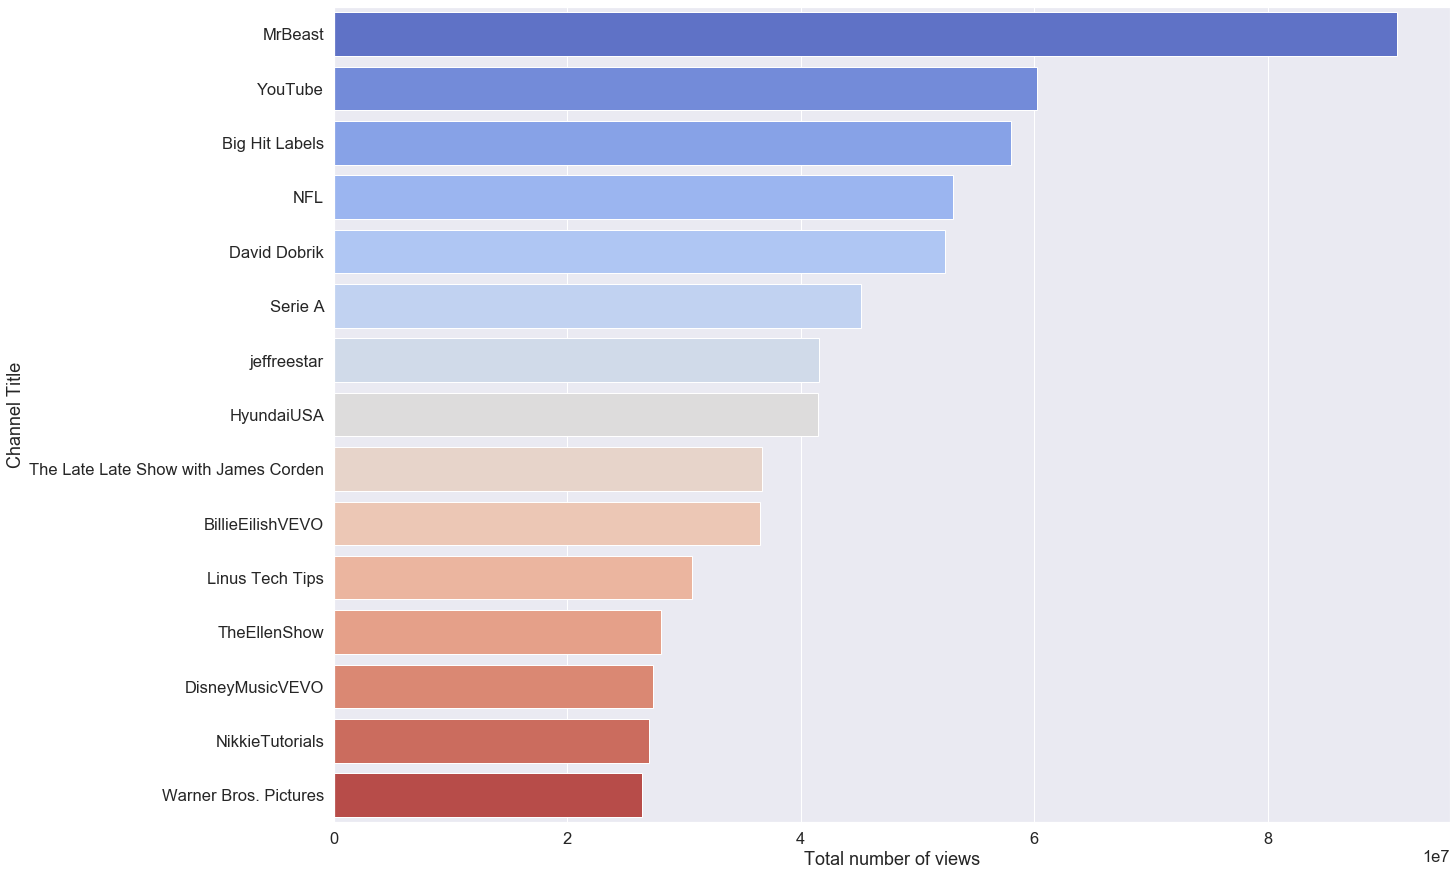

In [34]:
top_views_channels = videos_df.groupby('channel_title')[['view_count', 'channel_title']].sum()
top_viwes_channels = top_views_channels.nlargest(15, 'view_count')

fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x=top_viwes_channels['view_count'], y=top_viwes_channels.index, palette='coolwarm', ax=ax)
ax.set(xlabel='Total number of views', ylabel='Channel Title')

### Top 15 most popular channels by number of likes

[Text(0, 0.5, 'Channel Title'), Text(0.5, 0, 'Total number of likes')]

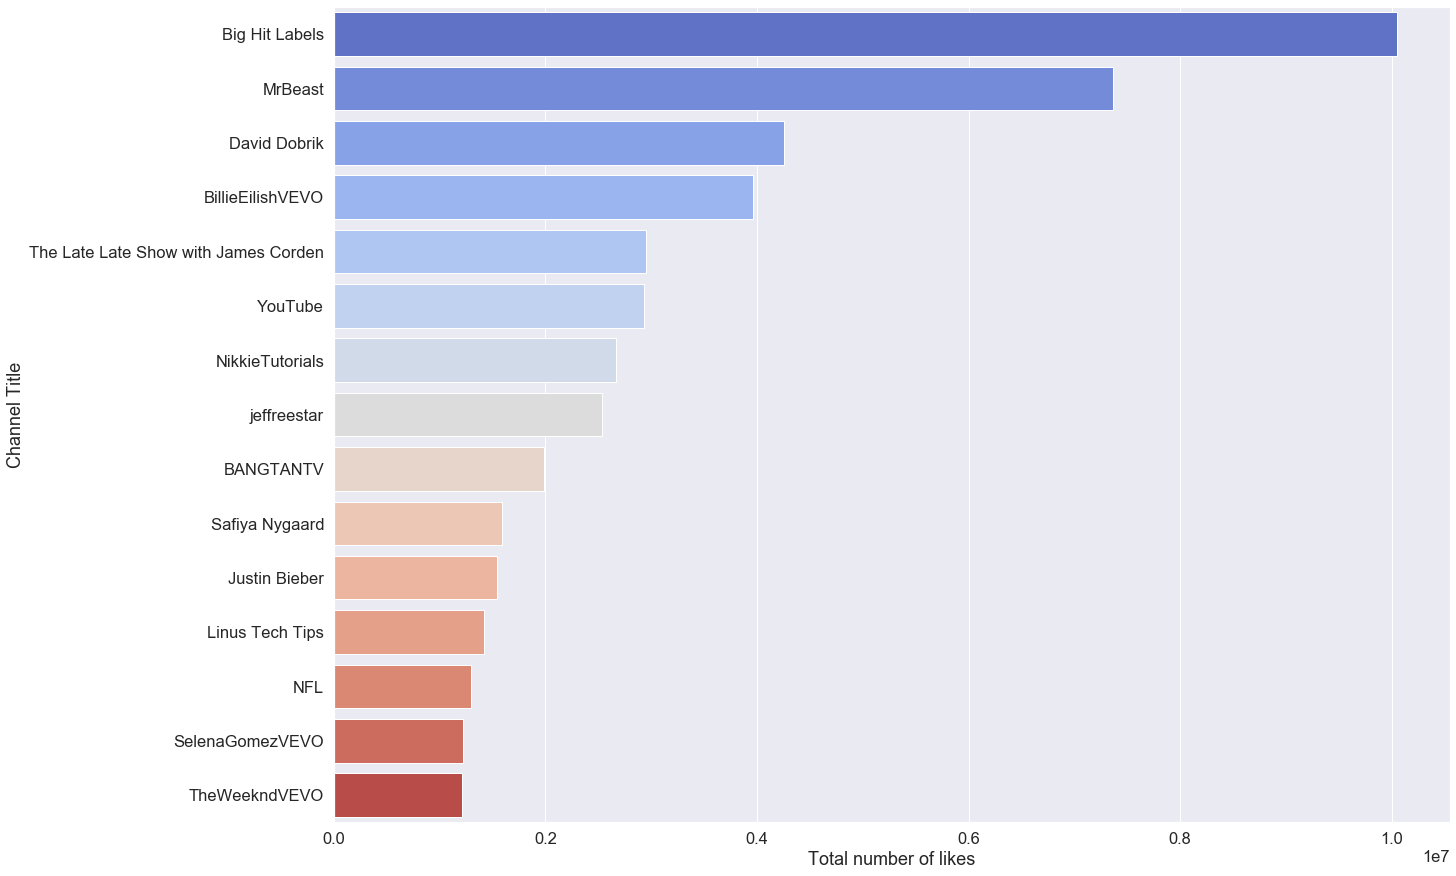

In [35]:
top_likes_channels = videos_df.groupby('channel_title')[['likes', 'channel_title']].sum()
top_likes_channels = top_likes_channels.nlargest(15, 'likes')

fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x=top_likes_channels['likes'], y=top_likes_channels.index, palette='coolwarm', ax=ax)
ax.set(xlabel='Total number of likes', ylabel='Channel Title')

### Processing the dates

In [36]:
videos_df['trending_date'] = pd.to_datetime(videos_df['trending_date'], format='%y.%d.%m')
videos_df['published_at'] = pd.to_datetime(videos_df['published_at'], format='%Y-%m-%dT%H:%M:%S.%fZ')
videos_df.head()

# get date or time from datetime
#videos_df['published_at'].dt.time
#videos_df['published_at'].dt.date

video_id                                              title  \
0  y7TlnQq6XzI                                       congrats ksi   
1  IByJccZwUlE  Club Brugge vs Real Madrid (1-3) | UEFA Champi...   
2  eb90gqGYP9c              THE WITCHER | FINAL TRAILER | NETFLIX   
3  vPx6M7eTYbc     Spill Your Guts: Harry Styles & Kendall Jenner   
4  Zm7Zya6Hl50              STORMZY - AUDACITY (feat. HEADIE ONE)   

         published_at                channel_id  \
0 2019-12-11 18:59:22  UCG8rbF3g2AMX70yOd8vqIZg   
1 2019-12-11 22:33:06  UC4i_9WvfPRTuRWEaWyfKuFw   
2 2019-12-12 10:15:01  UCWOA1ZGywLbqmigxE4Qlvuw   
3 2019-12-11 07:08:34  UCJ0uqCI0Vqr2Rrt1HseGirg   
4 2019-12-11 17:11:51  UC7D-09kUG6Ei11SVO_deW_w   

                          channel_title  category_id trending_date  \
0                            Logan Paul           24    2019-12-12   
1                              BT Sport           17    2019-12-12   
2                               Netflix           24    2019-12-12   
3  The Late Late Show with James Corden           24    2019-12-12   
4                               Stormzy           10    2019-12-12   

                                                tags  view_count   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...     2044821  139610   
1  sp:ty=high|sp:dt=2019-12-11T20:00:00Z|sp:st=so...      361939    4073   
2  The Witcher|Witcher|Henry Cavill|Geralt of Riv...      891295   60449   
3  The Late Late Show|Late Late Show|James Corden...    11118737  555670   
4  SOUNDS OF THE SKENG|STORMZY|CROWN|VOSSI BOP|OF...      958583   77346   

   dislikes  comment_count                                  thumbnail_link  \
0     30568          21254  https://i.ytimg.com/vi/y7TlnQq6XzI/default.jpg   
1       123            264  https://i.ytimg.com/vi/IByJccZwUlE/default.jpg   
2      2588           5394  https://i.ytimg.com/vi/eb90gqGYP9c/default.jpg   
3      7799          19648  https://i.ytimg.com/vi/vPx6M7eTYbc/default.jpg   
4       795           3433  https://i.ytimg.com/vi/Zm7Zya6Hl50/default.jpg   

   comments_disabled  ratings_disabled  \
0              False             False   
1              False             False   
2              False             False   
3              False             False   
4              False             False   

                                         description  days_in_trending  \
0  Install Raid for Free ✅ IOS: http://bit.ly/Log...                 7   
1  Real Madrid eased to victory in Belgium with V...                 1   
2  On a Continent riddled with evil, the paths of...                 4   
3  Late Late Show guest host Harry Styles challen...                 1   
4  STREAM/ DOWNLOAD AUDACITY NOW: https://stormzy...                 1   

   category_name  
0  Entertainment  
1          Sport  
2  Entertainment  
3  Entertainment  
4          Music

### Adding new column for number of days from video posting to trending

In [37]:
publish_to_trend = videos_df['trending_date'].dt.date - videos_df['published_at'].dt.date
videos_df['publish_to_trend'] = publish_to_trend.dt.days
videos_df.head()

video_id                                              title  \
0  y7TlnQq6XzI                                       congrats ksi   
1  IByJccZwUlE  Club Brugge vs Real Madrid (1-3) | UEFA Champi...   
2  eb90gqGYP9c              THE WITCHER | FINAL TRAILER | NETFLIX   
3  vPx6M7eTYbc     Spill Your Guts: Harry Styles & Kendall Jenner   
4  Zm7Zya6Hl50              STORMZY - AUDACITY (feat. HEADIE ONE)   

         published_at                channel_id  \
0 2019-12-11 18:59:22  UCG8rbF3g2AMX70yOd8vqIZg   
1 2019-12-11 22:33:06  UC4i_9WvfPRTuRWEaWyfKuFw   
2 2019-12-12 10:15:01  UCWOA1ZGywLbqmigxE4Qlvuw   
3 2019-12-11 07:08:34  UCJ0uqCI0Vqr2Rrt1HseGirg   
4 2019-12-11 17:11:51  UC7D-09kUG6Ei11SVO_deW_w   

                          channel_title  category_id trending_date  \
0                            Logan Paul           24    2019-12-12   
1                              BT Sport           17    2019-12-12   
2                               Netflix           24    2019-12-12   
3  The Late Late Show with James Corden           24    2019-12-12   
4                               Stormzy           10    2019-12-12   

                                                tags  view_count   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...     2044821  139610   
1  sp:ty=high|sp:dt=2019-12-11T20:00:00Z|sp:st=so...      361939    4073   
2  The Witcher|Witcher|Henry Cavill|Geralt of Riv...      891295   60449   
3  The Late Late Show|Late Late Show|James Corden...    11118737  555670   
4  SOUNDS OF THE SKENG|STORMZY|CROWN|VOSSI BOP|OF...      958583   77346   

   dislikes  comment_count                                  thumbnail_link  \
0     30568          21254  https://i.ytimg.com/vi/y7TlnQq6XzI/default.jpg   
1       123            264  https://i.ytimg.com/vi/IByJccZwUlE/default.jpg   
2      2588           5394  https://i.ytimg.com/vi/eb90gqGYP9c/default.jpg   
3      7799          19648  https://i.ytimg.com/vi/vPx6M7eTYbc/default.jpg   
4       795           3433  https://i.ytimg.com/vi/Zm7Zya6Hl50/default.jpg   

   comments_disabled  ratings_disabled  \
0              False             False   
1              False             False   
2              False             False   
3              False             False   
4              False             False   

                                         description  days_in_trending  \
0  Install Raid for Free ✅ IOS: http://bit.ly/Log...                 7   
1  Real Madrid eased to victory in Belgium with V...                 1   
2  On a Continent riddled with evil, the paths of...                 4   
3  Late Late Show guest host Harry Styles challen...                 1   
4  STREAM/ DOWNLOAD AUDACITY NOW: https://stormzy...                 1   

   category_name  publish_to_trend  
0  Entertainment                 1  
1          Sport                 1  
2  Entertainment                 0  
3  Entertainment                 1  
4          Music                 1

### Top 15 videos that were the longest in trending

[Text(0, 0.5, 'Video Title'), Text(0.5, 0, 'Days in trending')]

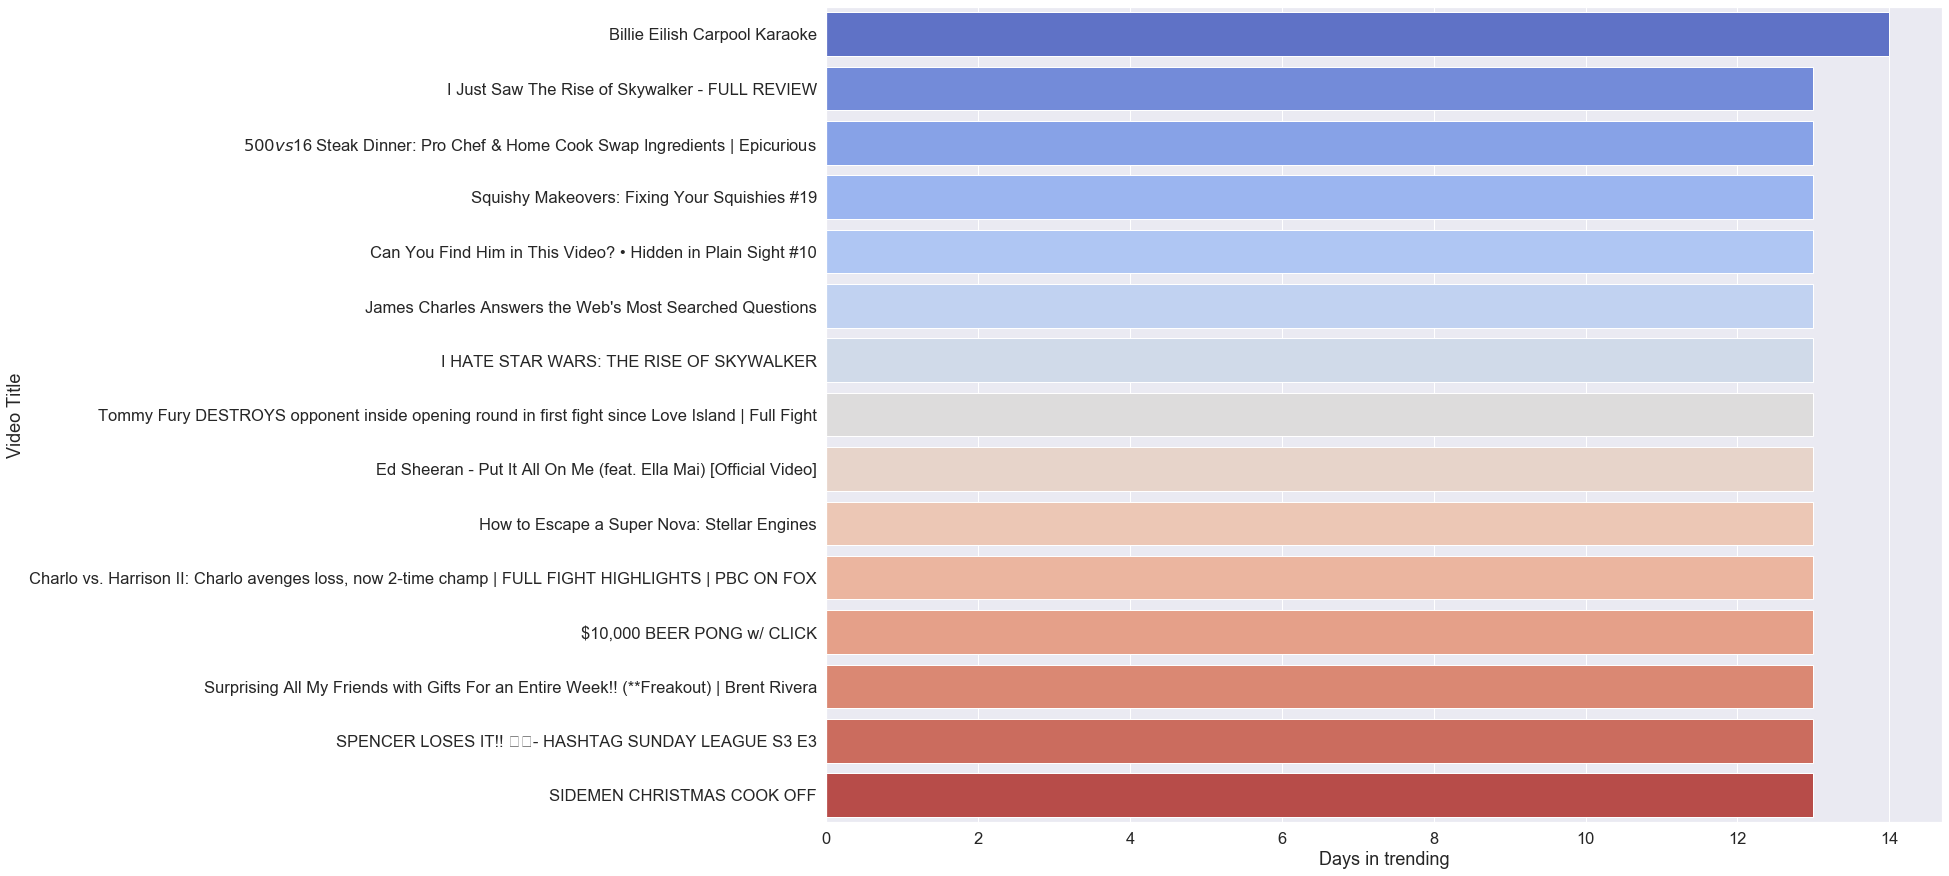

In [39]:
# top 15 videos that were the longest in trending
top_videos = videos_df.nlargest(15, 'days_in_trending')

fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x=top_videos['days_in_trending'], y=top_videos['title'], palette='coolwarm', ax=ax)
ax.set(xlabel='Days in trending', ylabel='Video Title')

[Text(0.5, 0, 'Days in trending')]

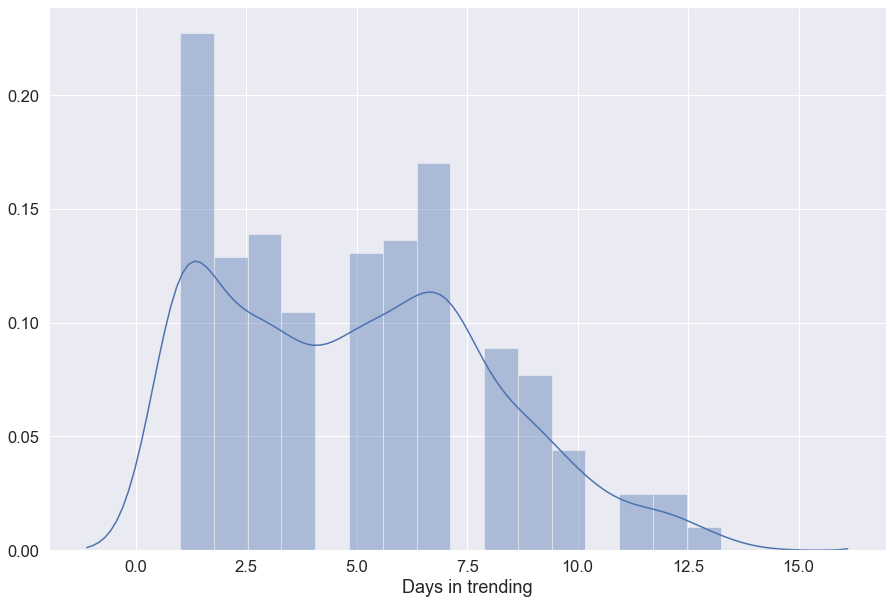

In [40]:
# distribution of days in trending
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(videos_df['days_in_trending'])
ax.set(xlabel='Days in trending')

### Likes/Dislikes ratio by category

[Text(0, 0.5, 'Category'), Text(0.5, 0, 'Likes/Dislikes Ratio')]

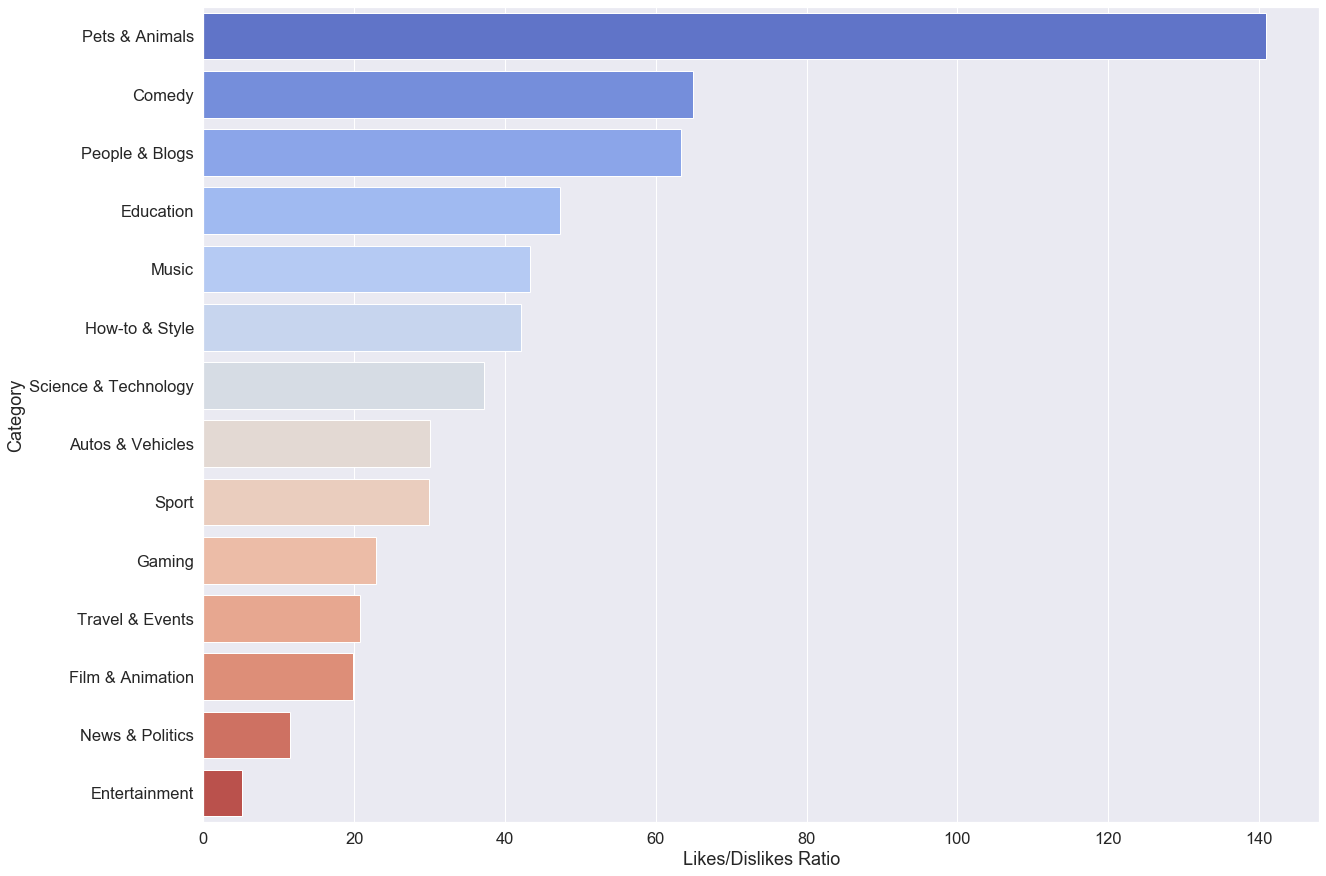

In [41]:
like_dislike_ratio = videos_df.groupby('category_name')['likes'].sum() / videos_df.groupby('category_name')['dislikes'].sum()
like_dislike_ratio = like_dislike_ratio.sort_values(ascending=False).reset_index()
like_dislike_ratio.columns = ['category','ratio']
fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x='ratio', y='category', data=like_dislike_ratio, palette='coolwarm', ax=ax)
ax.set(xlabel='Likes/Dislikes Ratio', ylabel='Category')

### Comments/Views ratio by category

[Text(0, 0.5, 'Category'), Text(0.5, 0, 'Views/Comments Ratio')]

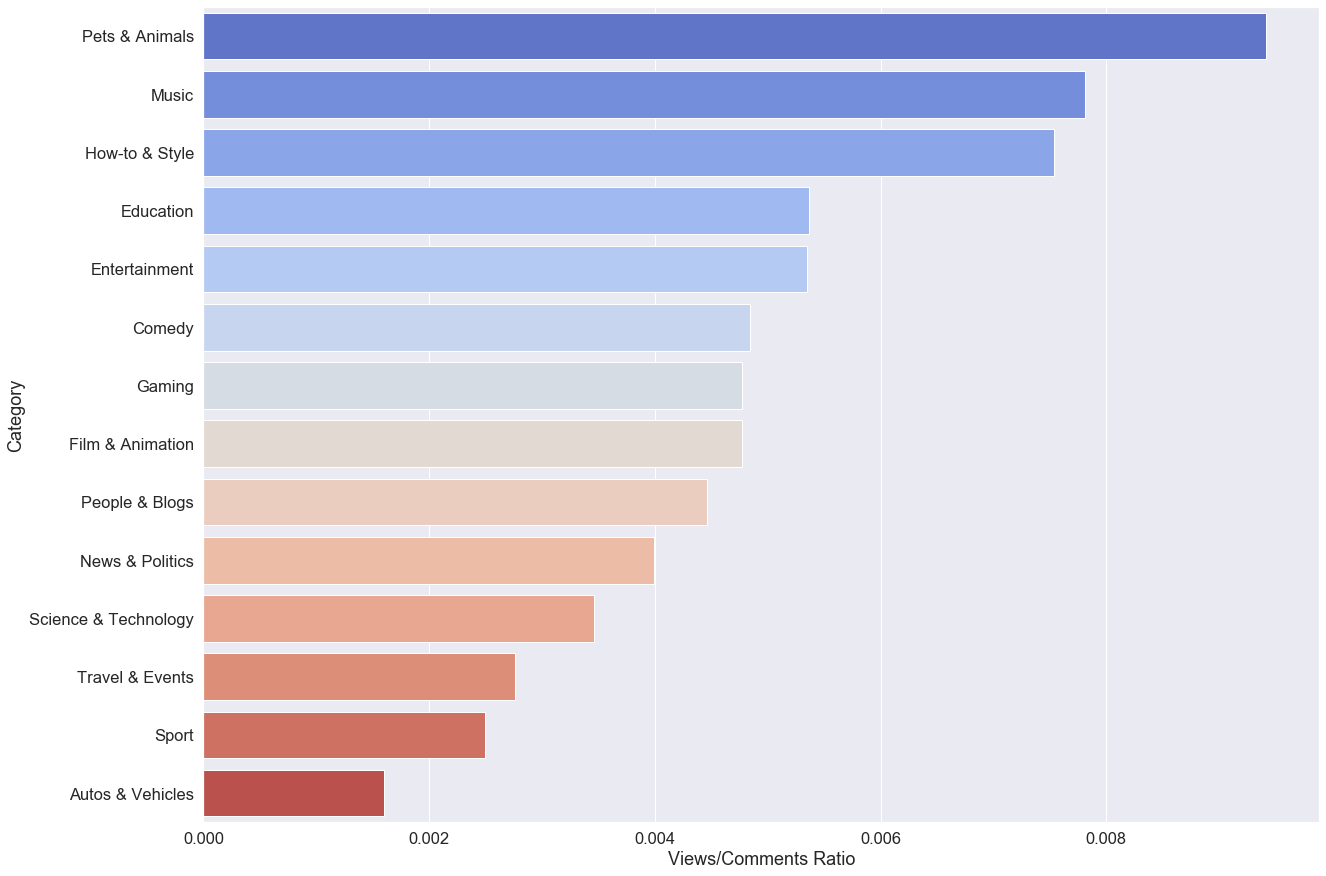

In [42]:
view_comment_ratio = videos_df.groupby('category_name')['comment_count'].sum() / videos_df.groupby('category_name')['view_count'].sum()
view_comment_ratio = view_comment_ratio.sort_values(ascending=False).reset_index()
view_comment_ratio.columns = ['category','ratio']
fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x='ratio', y='category', data=view_comment_ratio, palette='coolwarm', ax=ax)
ax.set(xlabel='Views/Comments Ratio', ylabel='Category')

### Likes/Views ratio by category

[Text(0, 0.5, 'Category'), Text(0.5, 0, 'Views/Likes Ratio')]

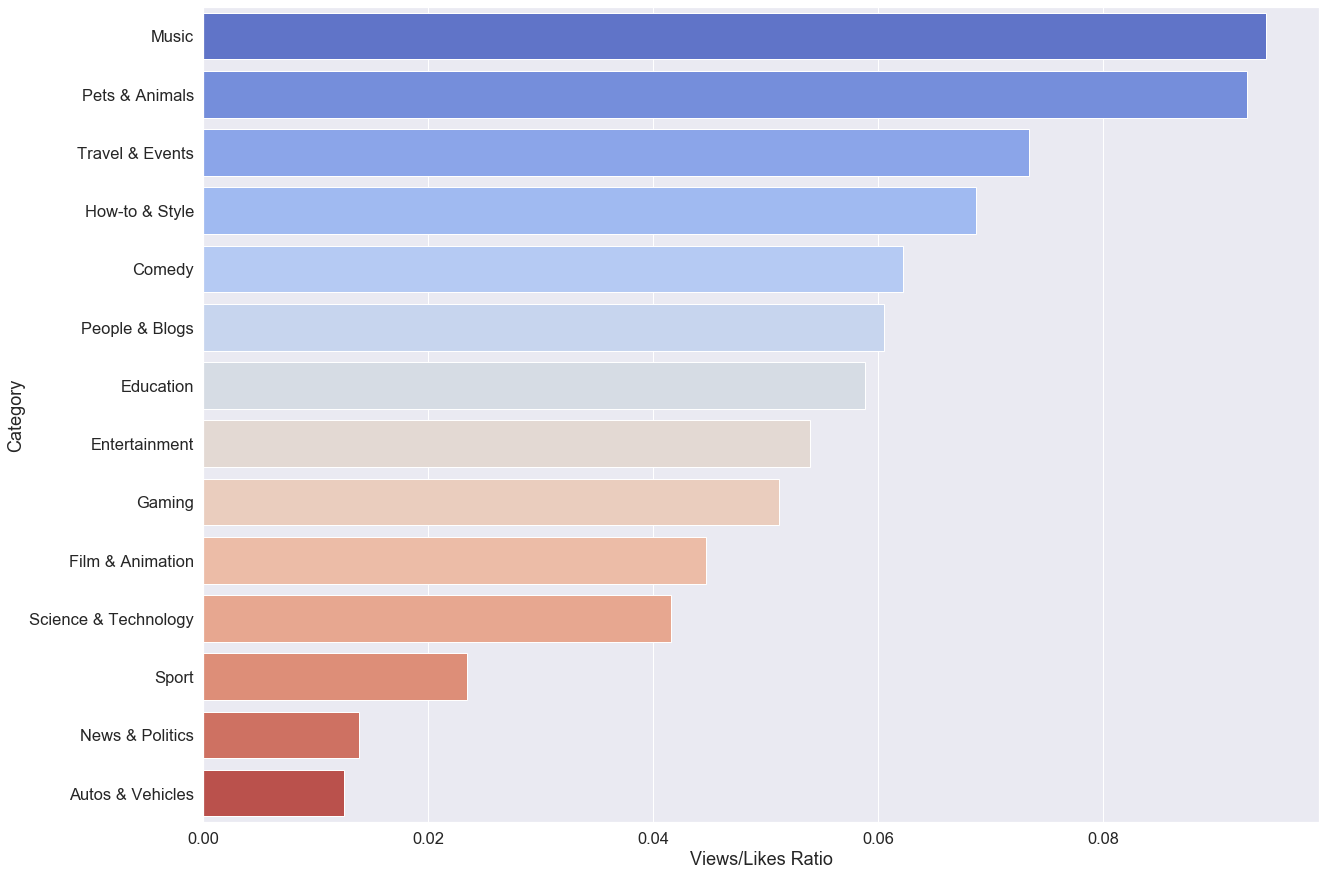

In [43]:
view_like_ratio = videos_df.groupby('category_name')['likes'].sum() / videos_df.groupby('category_name')['view_count'].sum()
view_like_ratio = view_like_ratio.sort_values(ascending=False).reset_index()
view_like_ratio.columns = ['category','ratio']
fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x='ratio', y='category', data=view_like_ratio, palette='coolwarm', ax=ax)
ax.set(xlabel='Views/Likes Ratio', ylabel='Category')

### Dislikes/Views ratio by category

[Text(0, 0.5, 'Category'), Text(0.5, 0, 'Views/Dislikes Ratio')]

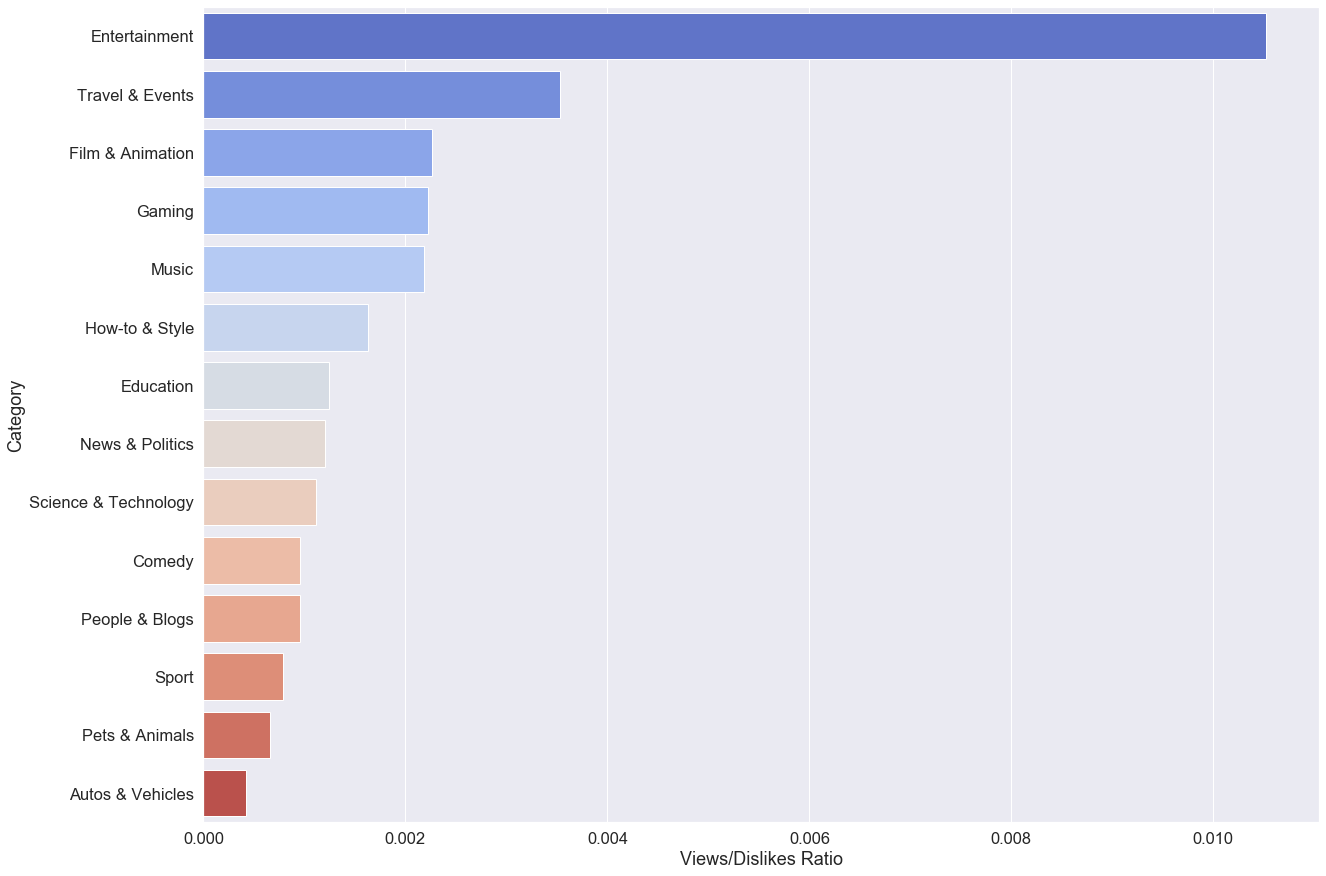

In [44]:
view_dislike_ratio = videos_df.groupby('category_name')['dislikes'].sum() / videos_df.groupby('category_name')['view_count'].sum()
view_dislike_ratio = view_dislike_ratio.sort_values(ascending=False).reset_index()
view_dislike_ratio.columns = ['category','ratio']
fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x='ratio', y='category', data=view_dislike_ratio, palette='coolwarm', ax=ax)
ax.set(xlabel='Views/Dislikes Ratio', ylabel='Category')

### Top views videos wall

In [45]:
top_videos = videos_df.sort_values('view_count', ascending=False)
top_videos_thumbnail = top_videos['thumbnail_link'].head(100).reset_index()['thumbnail_link']
top_videos_thumbnail

0     https://i.ytimg.com/vi/2lAe1cqCOXo/default.jpg
1     https://i.ytimg.com/vi/85iRQdjCzj0/default.jpg
2     https://i.ytimg.com/vi/pILCn6VO_RU/default.jpg
3     https://i.ytimg.com/vi/gIOyB9ZXn8s/default.jpg
4     https://i.ytimg.com/vi/LZyybvVx-js/default.jpg
                           ...                      
95    https://i.ytimg.com/vi/H2t7lknrK28/default.jpg
96    https://i.ytimg.com/vi/PretZn_GAAk/default.jpg
97    https://i.ytimg.com/vi/WRbaQrb3Jhk/default.jpg
98    https://i.ytimg.com/vi/9HDEHj2yzew/default.jpg
99    https://i.ytimg.com/vi/FGvD1Vi0WDw/default.jpg
Name: thumbnail_link, Length: 100, dtype: object

In [46]:
rows = 10
columns = 10
tempHTML = ''
innerHTML = '<div style="block">'
    
for r in range(rows):
    rowHTML = ''
    for c in range(columns):
        tempHTML = '<img src="' + top_videos_thumbnail[c*10 + r] + '"style="float:left;width:80px;height:80px;margin:0">'
        rowHTML += tempHTML
    innerHTML += rowHTML
innerHTML += '</div>'
display(HTML(innerHTML))

### Heatmap of Category vs Trending Duration ratio

Text(151.421875, 0.5, 'Category')

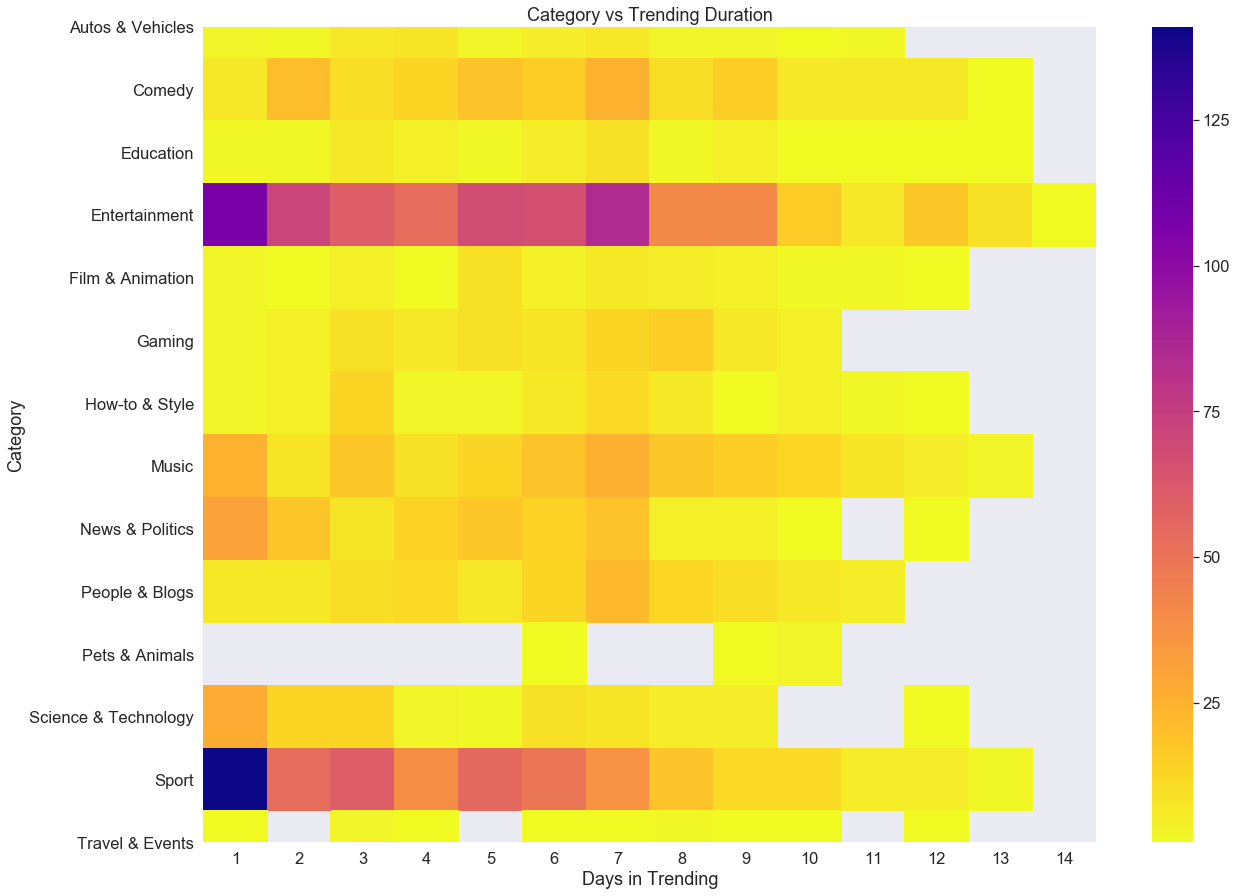

In [47]:
cat_trend_duration = videos_df.groupby(['category_name','days_in_trending']).count()['video_id'].unstack().clip(upper=300)

fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(cat_trend_duration, cmap='plasma_r')
plt.title("Category vs Trending Duration")
plt.xlabel('Days in Trending')
plt.ylabel('Category')

### The most popular time to upload video

[Text(0, 0.5, 'Number of videos published at the specific hour'),
 Text(0.5, 0, 'The hour when the video was published')]

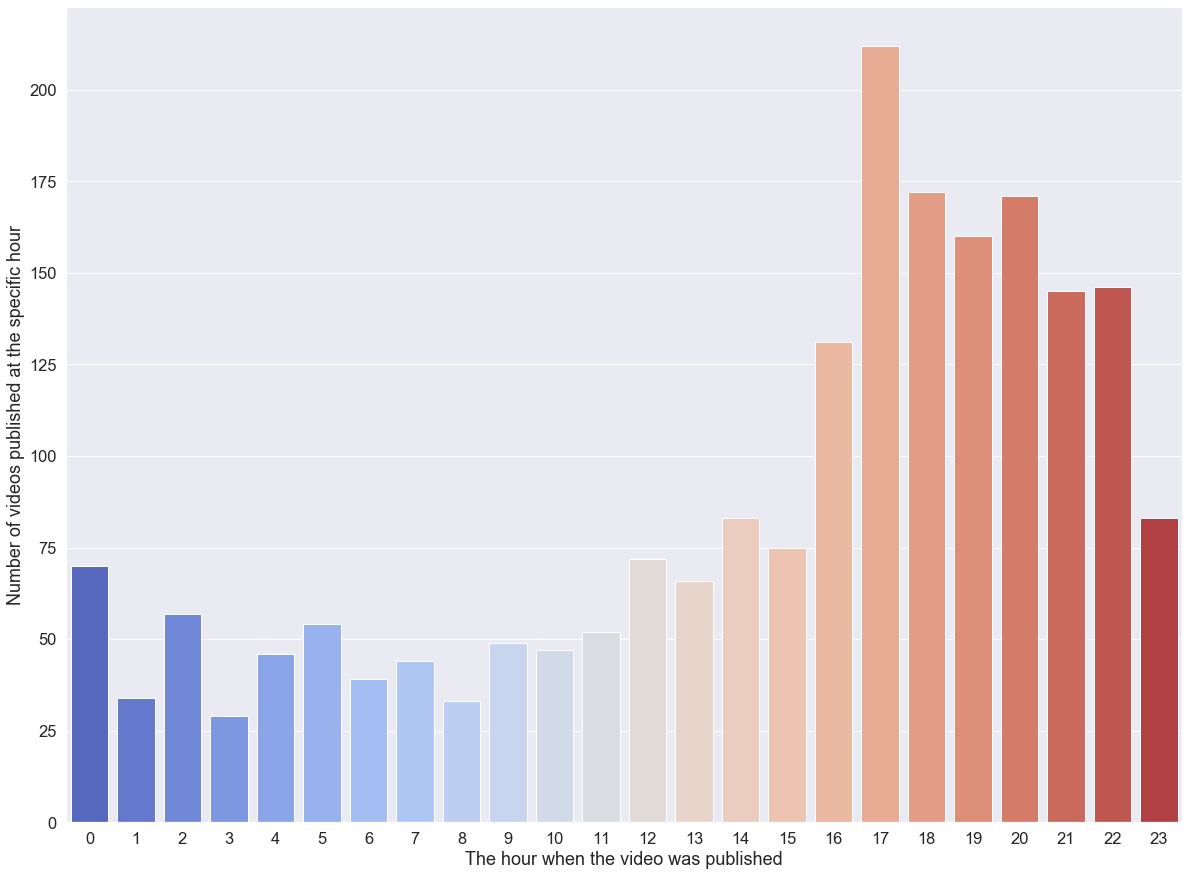

In [48]:
#most popular period of day to upload video

videos_df['publishing_hour'] = pd.to_datetime(videos_df['published_at']).dt.hour
videos_df.head()

num_videos_in_each_hour = videos_df.groupby('publishing_hour')[['video_id', 'publishing_hour']].count()

fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x=num_videos_in_each_hour.index, y=num_videos_in_each_hour['video_id'], palette='coolwarm', ax=ax)
ax.set(xlabel='The hour when the video was published', ylabel='Number of videos published at the specific hour')

### The most popular day of week for publishing video

In [49]:
#get name of day from published_at
def map_date_to_day_name(date):
    return date.strftime('%A')

videos_df['publishing_day'] = videos_df['published_at'].apply(lambda var: map_date_to_day_name(var))

[Text(0, 0.5, 'Number of videos published at the specific day in week'),
 Text(0.5, 0, 'The day in week when the video was published')]

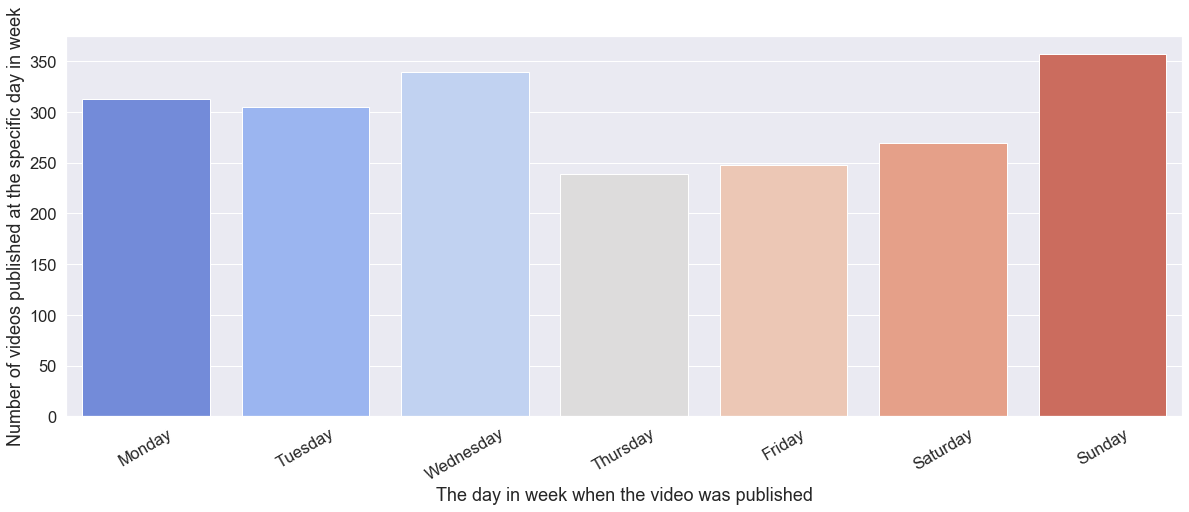

In [50]:
#most popular day to upload video

num_videos_in_each_day = videos_df.groupby('publishing_day')[['video_id', 'publishing_day']].count()
days_in_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize=(20, 7))
sns.countplot(x='publishing_day', data=videos_df, order=days_in_week, palette='coolwarm', ax=ax)
plt.xticks(rotation=30)
ax.set(xlabel='The day in week when the video was published', ylabel='Number of videos published at the specific day in week')

### Jointplots between likes, comments, views, days in trending, days to get in trending...

C:\Users\Marko\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5, 0.98, 'Corellation between likes and views')

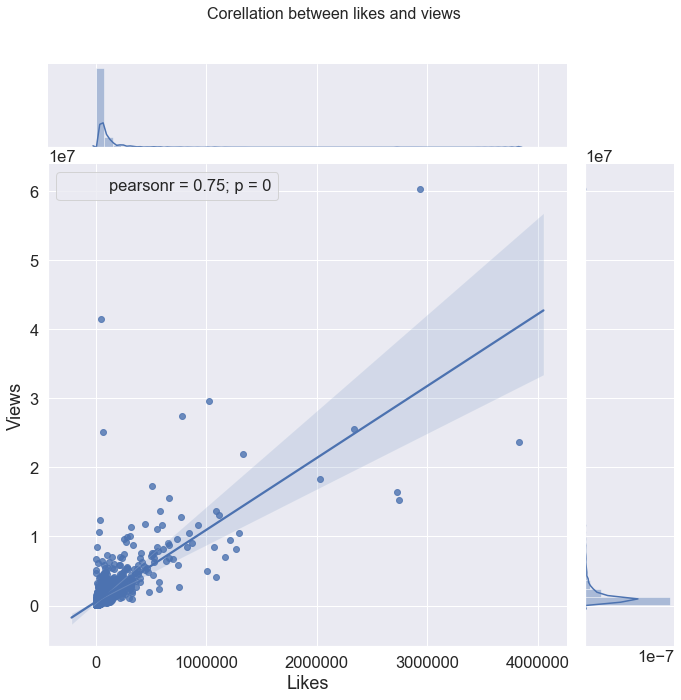

In [51]:
# Corellation between likes and views
likes_views = (sns.jointplot(data=videos_df, x='likes', y='view_count', kind='reg', height=10)
                .set_axis_labels("Likes", "Views"))
likes_views.annotate(stats.pearsonr)
likes_views.fig.subplots_adjust(top=0.9)
likes_views.fig.suptitle('Corellation between likes and views', fontsize=16)

Text(0.5, 0.98, 'Corellation between comments and views')

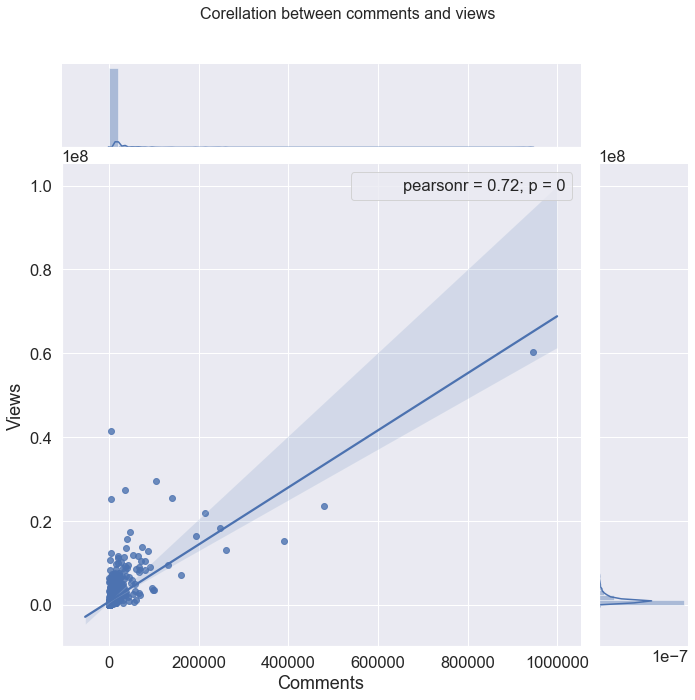

In [52]:
# Corellation between comments and views
comments_views = (sns.jointplot(data=videos_df, x='comment_count', y='view_count', kind='reg', height=10)
                .set_axis_labels("Comments", "Views"))
comments_views.annotate(stats.pearsonr)
comments_views.fig.subplots_adjust(top=0.9)
comments_views.fig.suptitle('Corellation between comments and views', fontsize=16)

Text(0.5, 0.98, 'Corellation between likes and comments')

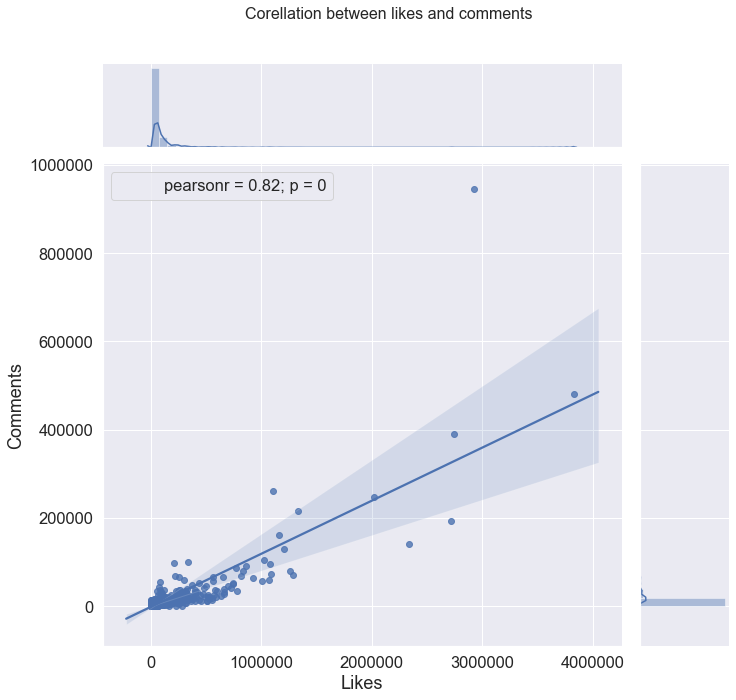

In [53]:
# Corellation between likes and comments
likes_comments = (sns.jointplot(data=videos_df, x='likes', y='comment_count', kind='reg', height=10)
                .set_axis_labels("Likes", "Comments"))
likes_comments.annotate(stats.pearsonr)
likes_comments.fig.subplots_adjust(top=0.9)
likes_comments.fig.suptitle('Corellation between likes and comments', fontsize=16)

Text(0.5, 0.98, 'Corellation between views and days in trending')

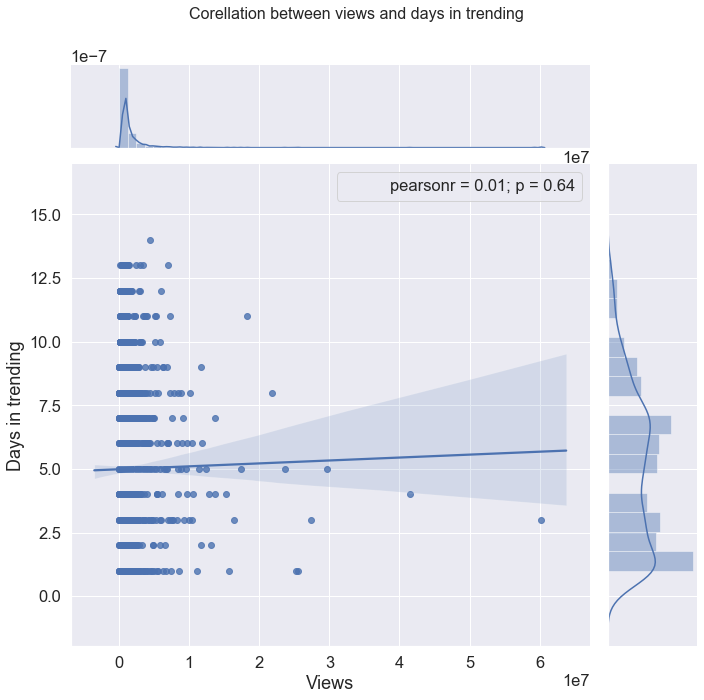

In [54]:
# Corellation between views and days in trending
views_trending = (sns.jointplot(data=videos_df, x='view_count', y='days_in_trending', kind='reg', height=10)
                .set_axis_labels("Views", "Days in trending"))
views_trending.annotate(stats.pearsonr)
views_trending.fig.subplots_adjust(top=0.9)
views_trending.fig.suptitle('Corellation between views and days in trending', fontsize=16)

# THERE ISN'T ANY CORELLATION BETWEEN VIEWS AND DAYS IN TRENDING!!!

Text(0.5, 0.98, 'Corellation between likes and days in trending')

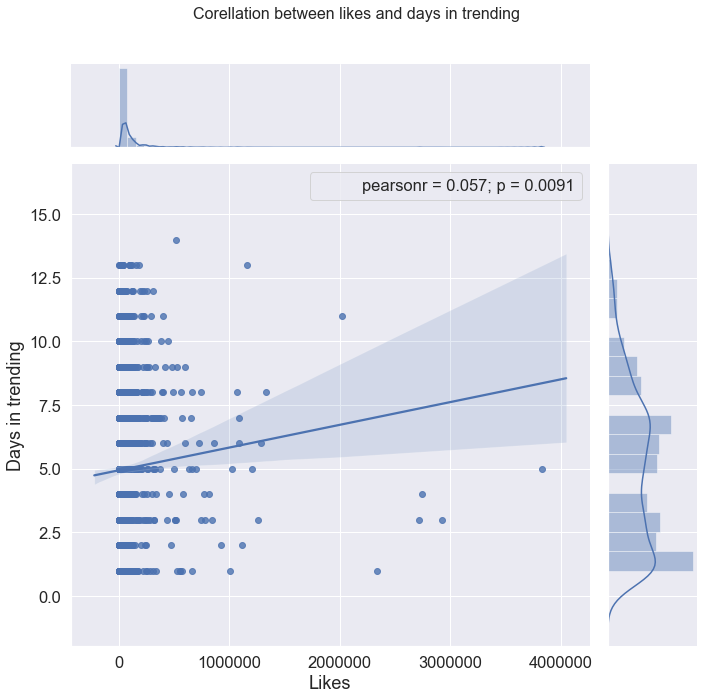

In [55]:
# Corellation between likes and days in trending
views_trending = (sns.jointplot(data=videos_df, x='likes', y='days_in_trending', kind='reg', height=10)
                .set_axis_labels("Likes", "Days in trending"))
views_trending.annotate(stats.pearsonr)
views_trending.fig.subplots_adjust(top=0.9)
views_trending.fig.suptitle('Corellation between likes and days in trending', fontsize=16)

# THERE ISN'T ANY CORELLATION BETWEEN LIKES AND DAYS IN TRENDING!!!

Text(0.5, 0.98, 'Corellation between comments and days in trending')

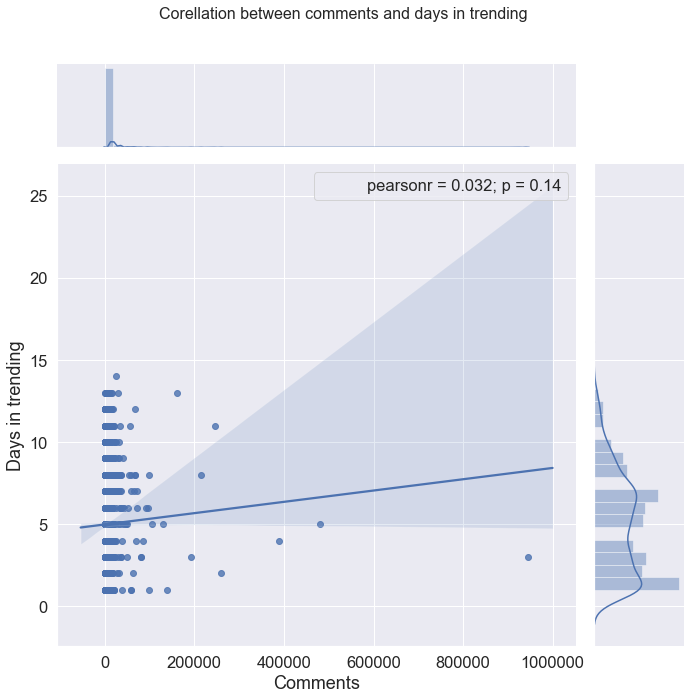

In [56]:
# Corellation between comments and days in trending
views_trending = (sns.jointplot(data=videos_df, x='comment_count', y='days_in_trending', kind='reg', height=10)
                .set_axis_labels("Comments", "Days in trending"))
views_trending.annotate(stats.pearsonr)
views_trending.fig.subplots_adjust(top=0.9)
views_trending.fig.suptitle('Corellation between comments and days in trending', fontsize=16)

# THERE ISN'T ANY CORELLATION BETWEEN COMMENTS AND DAYS IN TRENDING!!!

Text(0.5, 0.98, 'Corellation between days to trend and days in trending')

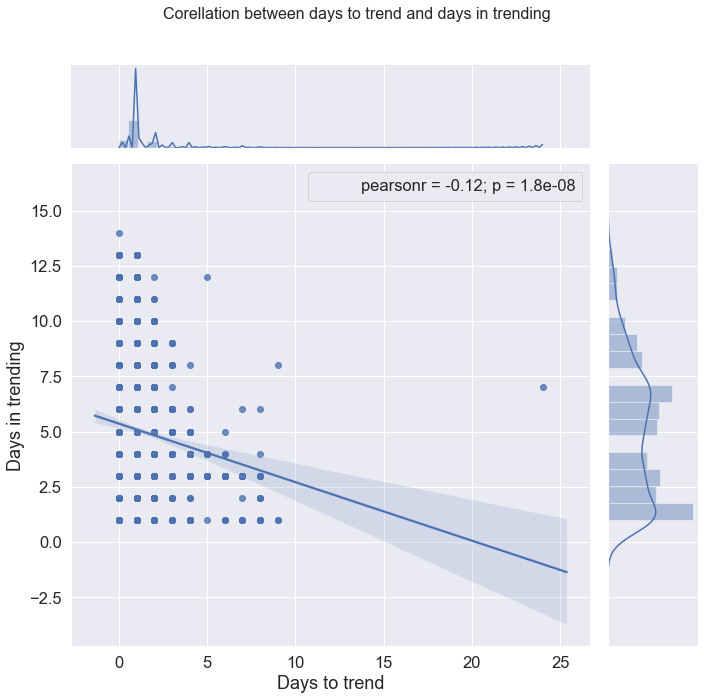

In [57]:
# Corellation between days to trend and days in trending
views_trending = (sns.jointplot(data=videos_df, x='publish_to_trend', y='days_in_trending', kind='reg', height=10)
                .set_axis_labels("Days to trend", "Days in trending"))
views_trending.annotate(stats.pearsonr)
views_trending.fig.subplots_adjust(top=0.9)
views_trending.fig.suptitle('Corellation between days to trend and days in trending', fontsize=16)

# THERE ISN'T ANY CORELLATION BETWEEN DAYS TO TREND AND DAYS IN TRENDING!!!